## Подготовка данных

###  Откройте файлы и изучите их.

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

pd.options.mode.chained_assignment = None  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
df = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(train.info())
display(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Оценим масштабы пропусков и дубликатов

display(train.isnull().sum())
display(test.isna().sum())
display(df.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

Уффф. Пропусков вышло очень много и все они разбросаны по всей таблице.

In [5]:
display(train.duplicated().sum())
display(test.duplicated().sum())
display(df.duplicated().sum())

0

0

0

Хотя бы тут все чисто.

### Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Эффективность обогащения рассчитывается по формуле:

Recovery = (C(F-T)/F(C-T))*100%

где:

* C — доля золота в концентрате после флотации/очистки **(rougher.output.concentrate_au)**
* F — доля золота в сырье/концентрате до флотации/очистки **(rougher.input.feed_au)**
* T — доля золота в отвальных хвостах после флотации/очистки **(rougher.output.tail)**

In [6]:
# Так как на данном этапе есть пропуски в данных, создадим временную таблицу с удаленными пропусками.

temp_train = train.dropna()

In [7]:
# Создадим функцию, которая будет возвращать результат формулы.

def recovery(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    result = ((C*(F-T))/(F*(C-T)))*100
    return result

In [8]:
temp_train['recovery'] = temp_train.apply(recovery, axis=1)

In [9]:
mae_recovery = MAE(temp_train['rougher.output.recovery'], temp_train['recovery'])
mae_recovery

9.460144184559453e-15

In [10]:
mae_recovery.round()

0.0

Судя по всему, там крайне маленькое число, а это значит, что эффективность обогащения рассчитана правильно. Ура!

### Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [11]:
difference = set(df.columns) - set(test.columns)
print('\n'.join(difference))

secondary_cleaner.output.tail_pb
rougher.calculation.floatbank10_sulfate_to_au_feed
final.output.concentrate_sol
primary_cleaner.output.concentrate_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_sol
primary_cleaner.output.concentrate_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.concentrate_ag
rougher.output.tail_au
primary_cleaner.output.concentrate_au
final.output.tail_ag
rougher.calculation.au_pb_ratio
final.output.concentrate_ag
rougher.output.tail_pb
rougher.output.concentrate_ag
final.output.tail_sol
primary_cleaner.output.tail_ag
final.output.tail_pb
final.output.recovery
final.output.concentrate_pb
rougher.output.recovery
primary_cleaner.output.tail_pb
rougher.output.tail_sol
rougher.output.concentrate_au
secondary_cleaner.output.tail_ag
final.output.concentrate_au
rougher.output.tail_ag
final.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank11_sulfate_to_au_feed
primary_cleaner.output.tail_au
rougher.outp

В тестовой выборке отсутствуют столбцы OUTPUT и CALCULATION. В них находятся промежуточные и финальные подсчеты выхода металлов. Так как данные собраны в будущем, мы уже имеем эти значения, но модель будет применяться тогда, когда они ещё не получены. Поэтому все эти столбцы надо будет удалить их обучающей выборки тоже. Пусть модель не обольщается, помощь к ней не придет. *Злобный смех*

### Проведите предобработку данных.

In [12]:
# Начнем с удаления подсказывающих столбцов в обучающей выборке

train = train.drop(labels=difference, axis=1)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   primary_cleaner.input.sulfate               15553 non-null  float64
 2   primary_cleaner.input.depressant            15598 non-null  float64
 3   primary_cleaner.input.feed_size             16860 non-null  float64
 4   primary_cleaner.input.xanthate              15875 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      16822 non-null  float64
 10  primary_cl

Настало время разобраться с пропусками. Вообще я очень не люблю заполнять пропуски, потому что боюсь исказить данные, из-за чего модель потом будет обучена не так. Посмотрим сначала, насколько существенные пропуски. Может их можно безболезненно удалить.

In [14]:
display(train.dropna().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13522 non-null  object 
 1   primary_cleaner.input.sulfate               13522 non-null  float64
 2   primary_cleaner.input.depressant            13522 non-null  float64
 3   primary_cleaner.input.feed_size             13522 non-null  float64
 4   primary_cleaner.input.xanthate              13522 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13522 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13522 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13522 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13522 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13522 non-null  float64
 10  primary_cl

None

In [15]:
print('Процент пропусков в train:', ((16860 - 13522)/16860)*100)

Процент пропусков в train: 19.798339264531435


Пропусков очень много. Придется их оставить. Так как модель с пропусками работать не умеет, то придется найти способ их заполнения. 

Так как в задании у нас говорится, что соседние строки схожи по значениям, заполним их именно так.

In [16]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
df = df.fillna(method='ffill')

In [17]:
# Посмотрим на красивую табличку без пропусков
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   primary_cleaner.input.sulfate               16860 non-null  float64
 2   primary_cleaner.input.depressant            16860 non-null  float64
 3   primary_cleaner.input.feed_size             16860 non-null  float64
 4   primary_cleaner.input.xanthate              16860 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      16860 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    16860 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      16860 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    16860 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      16860 non-null  float64
 10  primary_cl

## Анализ данных

###  Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

#### Au

In [18]:
# Для удобства создадим таблицы для каждого металла и возьмем среднюю концентрацию. 
# Так как для последующего анализа нам понадобится сумма концентрата, разделим таблицы
au = df[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
au.columns = ['После флотаци', 'После первичной очистки', 'После вторичной очистки']
au_mean = au.mean()
au_mean

После флотаци              17.831509
После первичной очистки    29.119967
После вторичной очистки    39.891718
dtype: float64

#### Ag

In [19]:
ag = df[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
ag.columns = ['После флотаци', 'После первичной очистки', 'После вторичной очистки']
ag_mean = ag.mean()
ag_mean

После флотаци              10.845609
После первичной очистки     7.666972
После вторичной очистки     4.768013
dtype: float64

#### Pb

In [20]:
pb = df[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
pb.columns = ['После флотаци', 'После первичной очистки', 'После вторичной очистки']
pb_mean = pb.mean()
pb_mean

После флотаци              6.886869
После первичной очистки    8.809217
После вторичной очистки    9.071366
dtype: float64

#### График концентрации металлов на 3х этапах очистки

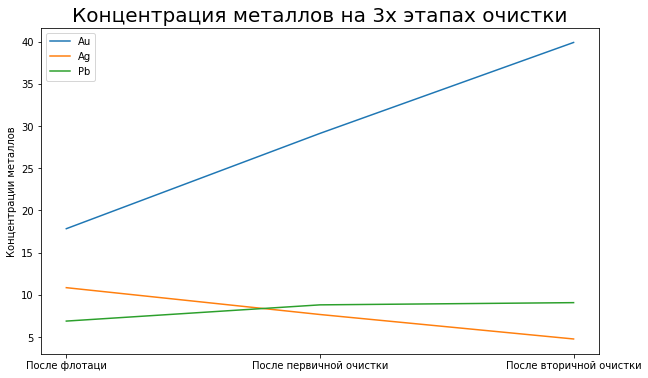

In [21]:
fig = plt.figure(figsize=(10, 6))

sns.lineplot(data=au_mean, label = 'Au')
sns.lineplot(data=ag_mean, label = 'Ag')
sns.lineplot(data=pb_mean, label = 'Pb')

plt.title('Концентрация металлов на 3х этапах очистки', fontsize =20)
plt.ylabel('Концентрации металлов')
plt.show()

Концентрация золота возрастает на каждом этапе. Оно и понятно, мы золото и пытаемся достать из руды. Серебро снижается, оно нам и не нужно. А вот почему свинец остается почти на том же уровне мне не понятно. По логике, его должно становиться меньше.

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

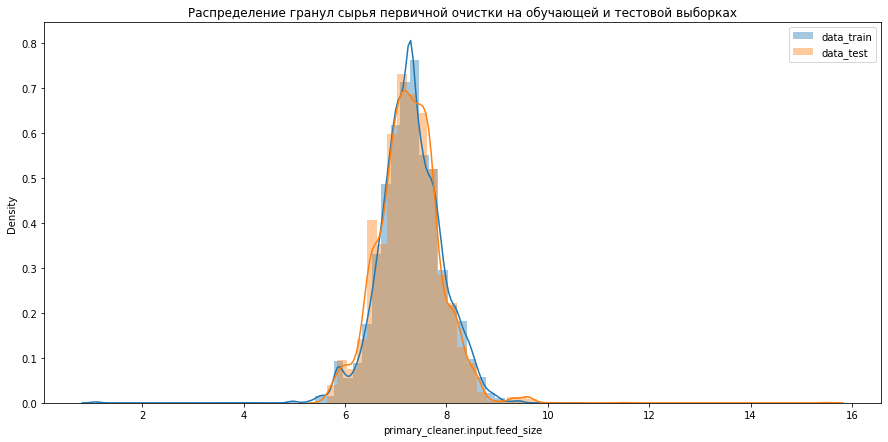

In [22]:
plt.figure(figsize = (15,7))

sns.distplot(train['primary_cleaner.input.feed_size'], bins=50, label='data_train')
sns.distplot(test['primary_cleaner.input.feed_size'],  bins=50, label='data_test')

plt.title('Распределение гранул сырья первичной очистки на обучающей и тестовой выборках')

plt.legend()
plt.show()

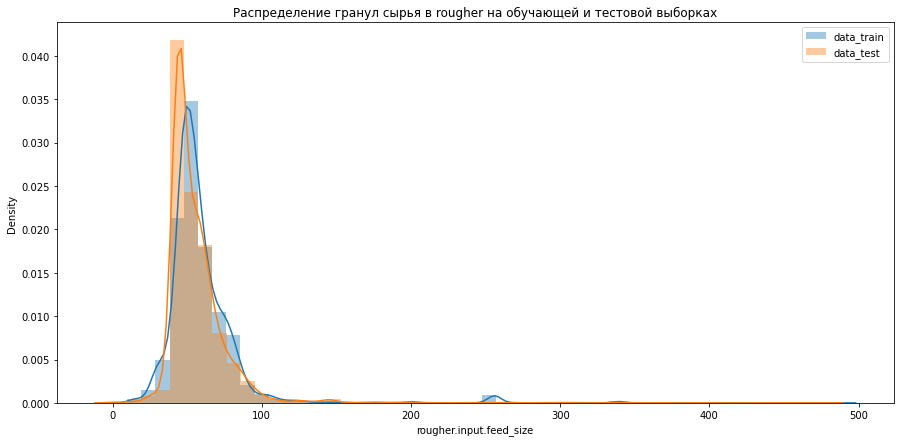

In [23]:
plt.figure(figsize = (15,7))

sns.distplot(train['rougher.input.feed_size'], bins=50, label='data_train')
sns.distplot(test['rougher.input.feed_size'],  bins=50, label='data_test')

plt.title('Распределение гранул сырья в rougher на обучающей и тестовой выборках')

plt.legend()
plt.show()

Распределение не сильно отличается на двух выборках. Модель должна сработать хорошо.

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Создадим отдельные 3 столбца концентратов в основной таблице df. Их там и так полно, одним больше, одним меньше :)

Для этого сложим output всех металлов на каждом этапе.

In [24]:
df['rougher.output.concentrate'] = (df['rougher.output.concentrate_ag']
                                      + df['rougher.output.concentrate_pb']
                                      + df['rougher.output.concentrate_sol']
                                      + df['rougher.output.concentrate_au'])

In [25]:
df['primary_cleaner.output.concentrate'] = (df['primary_cleaner.output.concentrate_ag']
                                              + df['primary_cleaner.output.concentrate_pb']
                                              + df['primary_cleaner.output.concentrate_sol']
                                              + df['primary_cleaner.output.concentrate_au'])

In [26]:
df['final.output.concentrate'] = (df['final.output.concentrate_ag']
                                    + df['final.output.concentrate_pb']
                                    + df['final.output.concentrate_sol']
                                    + df['final.output.concentrate_au'])

Построим график изменения концентратов.

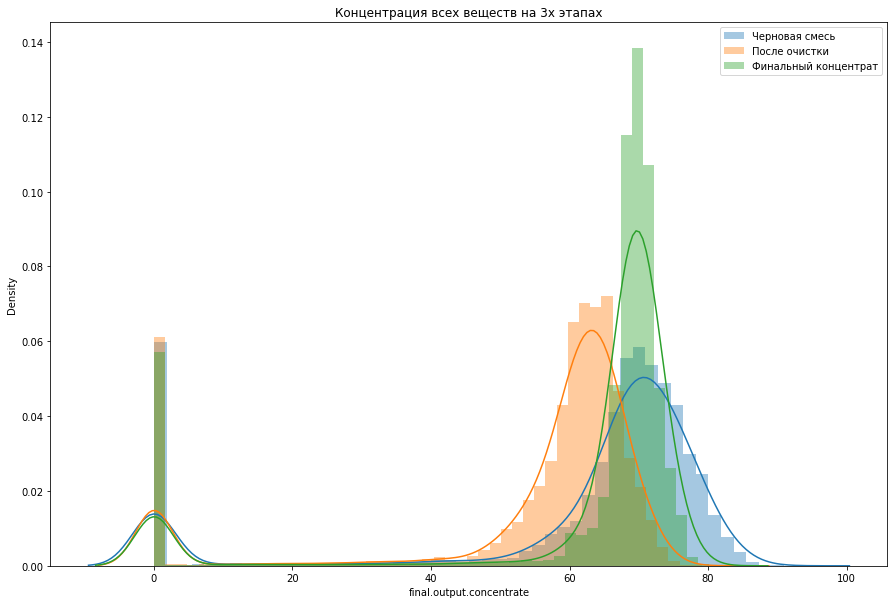

In [27]:
plt.figure(figsize = (15,10))

sns.distplot(df['rougher.output.concentrate'], label="Черновая смесь")
sns.distplot(df['primary_cleaner.output.concentrate'], label="После очистки")
sns.distplot(df['final.output.concentrate'], label="Финальный концентрат")

plt.title('Концентрация всех веществ на 3х этапах')

plt.legend()
plt.show()

Какой красивый график, если не смотреть на левую его часть! Определенно есть выбросы, от них нужно избавиться. Удалим все значения меньше 1.

In [28]:
df = df[(df['final.output.concentrate']>1) &
        (df['primary_cleaner.output.concentrate']>1) &
        (df['rougher.output.concentrate']>1)]

Основные данные вычищены. Осталось сопоставить индексы и удалить то же самое из test и train.

In [29]:
display(test.shape, train.shape)

(5856, 53)

(16860, 53)

In [30]:
test = test[test.index.isin(df.index)]
train = train[train.index.isin(df.index)]

In [31]:
display(test.shape, train.shape)

(5148, 53)

(14943, 53)

Теперь таблицы очищены и готовы к обучению модели.

## Модель

### Напишите функцию для вычисления итоговой sMAPE.

In [32]:
def smape(target, predictions):
             #1           #7             #2               #5               #2                   #4   #6
    smape = 1/len(target) * sum((abs(target - predictions)) / ((abs(target) + abs(predictions)) / 2) * 100)
    return smape

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Разобьем выборки на целевой признак и обучающие признаки. Уберем из обучающих признаков два столбца recovery.

In [33]:
target_train = df[df.index.isin(train.index)]
target_train = target_train['rougher.output.recovery']
features_train = train.drop(['date'], axis=1)

target_test = df[df.index.isin(test.index)]
target_test = target_test['rougher.output.recovery']
features_test = test.drop(['date'], axis=1)

В качестве двух моделей выберем случайный лес и линейную регрессию. Они мне больше нравятся :)

#### Случайный лес

In [34]:
# Подберем гиперпараметры для модели и сохраним их в переменных
params_RandomForestRegressor = {'max_depth': range(1,11),'n_estimators': range(10, 80, 10)}

In [35]:
score = make_scorer(smape)

In [36]:
model_forest = RandomizedSearchCV(RandomForestRegressor(random_state=12345),
                                  param_distributions=params_RandomForestRegressor,
                                  cv=5,
                                  scoring=score, 
                                  n_iter=30)

In [37]:
model_forest.fit(features_train, target_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
                   n_iter=30,
                   param_distributions={'max_depth': range(1, 11),
                                        'n_estimators': range(10, 80, 10)},
                   scoring=make_scorer(smape))

In [38]:
model_forest.best_params_

{'n_estimators': 60, 'max_depth': 9}

In [39]:
model_forest = RandomForestRegressor(random_state=12345, max_depth=9, n_estimators=50)

In [40]:
model_forest.fit(features_train, target_train)

RandomForestRegressor(max_depth=9, n_estimators=50, random_state=12345)

In [41]:
result_forest = cross_val_score(model_forest, features_train, target_train, cv=5, scoring=score).mean()

In [42]:
print('Лучший результат для случайного леса:', result_forest)

Лучший результат для случайного леса: 10.67855719599886


#### Линейная регрессия

In [43]:
model_regression = LinearRegression()
model_regression.fit(features_train, target_train)
result_regression = cross_val_score(model_regression, features_train, target_train, cv=5, scoring=score).mean()
print('Лучший результат для логистической регрессии:', result_regression)

Лучший результат для логистической регрессии: 8.360806635840913


#### Dummy Regressor

In [44]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(features_train, target_train)
result_dummy = cross_val_score(model_dummy, features_train, target_train, cv=5, scoring=score).mean()
print('Лучший результат для дамми:', result_dummy)

Лучший результат для дамми: 7.549201146868467


Лучший образом себя показал Случайный лес. Выбираем его как нашу рабочую модель.

### Обучение лучшей модели и вычисление итоговой sMAPE

Лучшей оказался случайный лес.

In [45]:
model_forest.fit(features_train, target_train)
predictions = model_forest.predict(features_test)

best_smape = smape(target_test, predictions)
display('По итогам выбраной модели лучший sMAPE =', best_smape)

'По итогам выбраной модели лучший sMAPE ='

9.806601236540077

## Вывод

Проведена обработка и исследовательский анализ данных. Проведена оценка концентрации металлов. На основе данных, построены 3 модели и выбрана лучшая - случайный лес. Он оказался на порядок эффективнее, чем предсказание из срадних с помощью dummy regressor. Ей оказался случайный лес. Отныне можно предсказывать количество золота, которое можно получить из руды.